In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb

from matplotlib.colors import Colormap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score

In [16]:
# Read in the wine producer dataset
uci_wine_names = ['Target',
                  'Alcohol',
                  'Malic acid',
                  'Ash',
                  'Alcalinity of ash',
                  'Magnesium',
                  'Total phenols',
                  'Flavanoids',
                  'Nonflavanoid phenols',
                  'Proanthocyanins',
                  'Color intensity',
                  'Hue',
                  'OD280/OD315 of diluted wines',
                  'Proline']
uci_wine = pd.read_csv('../data/wine_producer/wine.data', header=None, names=uci_wine_names)

# Remove the Target column from the dataset
uci_wine_unlabeled = uci_wine.drop('Target', axis=1)
uci_wine_unlabeled.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
# Find the number of unique targets (and their counts)
uci_wine['Target'].value_counts()

Target
2    71
1    59
3    48
Name: count, dtype: int64

In [18]:
# Train KMeans with 3 clusters according to the specified targets
kmeans = KMeans(n_clusters=3)
kmeans.fit(uci_wine_unlabeled)

KMeans(n_clusters=3)

In [19]:
# Calculate the silhouette score. Two alternative approaches
silhouette_score(uci_wine_unlabeled, kmeans.labels_)
silhouette_score(uci_wine_unlabeled, kmeans.predict(uci_wine_unlabeled))

0.571138193786884

In [20]:
# Davies-Bouldin Index
davies_bouldin_score(uci_wine_unlabeled, kmeans.labels_)

0.5342431775436286

In [21]:
# We want to plot the result
# Get the predicted labels
#kmeans.labels_
labels = kmeans.predict(uci_wine_unlabeled)

# Make a copy of our data and add a column for the predictions
uci_wine_labeled = uci_wine_unlabeled.copy()
uci_wine_labeled['label'] = labels

# Split the data into three separate dataframes according to the label
uci_wine_first = uci_wine_labeled[uci_wine_labeled['label']==0]
uci_wine_second = uci_wine_labeled[uci_wine_labeled['label']==1]
uci_wine_third = uci_wine_labeled[uci_wine_labeled['label']==2]

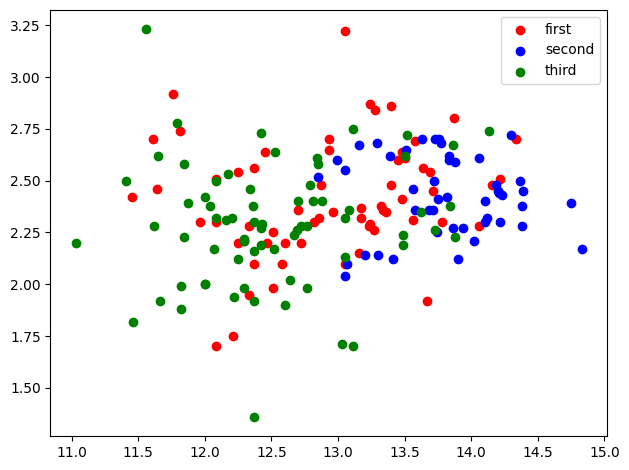

In [22]:

# Plot the dataframes with different colors. An easy extension would be to plot other, or all combinations of 
# features. Could also be nice to plot different symbols for wrongly labeled observations
fig, ax = plt.subplots(1,1)
ax.scatter(uci_wine_first['Alcohol'], uci_wine_first['Ash'],c='red',label='first')
ax.scatter(uci_wine_second['Alcohol'], uci_wine_second['Ash'],c='blue',label='second')
ax.scatter(uci_wine_third['Alcohol'], uci_wine_third['Ash'],c='green',label='third')
plt.legend()
plt.tight_layout()
plt.show()

<Axes: xlabel='Alcohol', ylabel='Ash'>

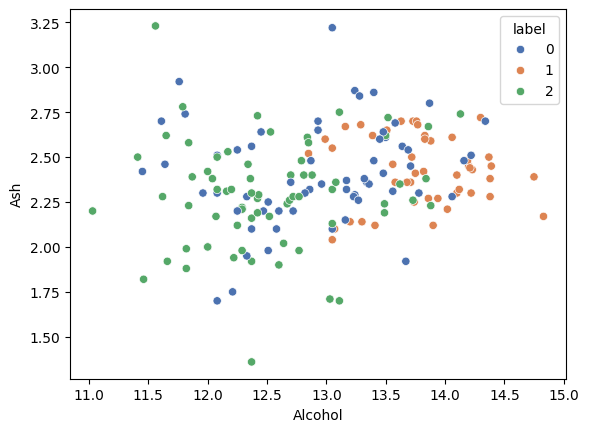

In [46]:
sb.scatterplot(data=uci_wine_labeled, x='Alcohol', y='Ash', hue='label', palette='deep')

In [23]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative.fit(uci_wine_unlabeled)

AgglomerativeClustering(n_clusters=3)

In [24]:
silhouette_score(uci_wine_unlabeled, agglomerative.labels_)

0.5644796401732071

In [25]:
davies_bouldin_score(uci_wine_unlabeled, agglomerative.labels_)

0.5357343073560251

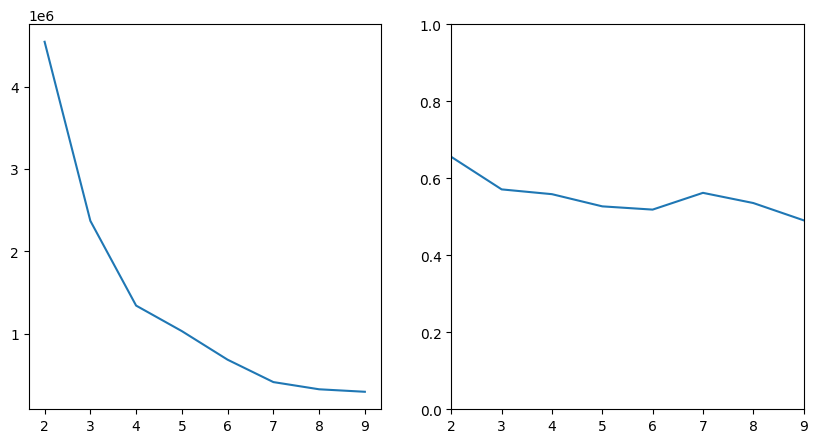

In [51]:
# Find natural clusters using the elbow method
scores_inertia = []
scores_silhouette = []
n_clusters = range(2,10)
for i in n_clusters:
    km = KMeans(n_clusters=i).fit(uci_wine_unlabeled)
    scores_inertia.append(km.inertia_)
    scores_silhouette.append(silhouette_score(uci_wine_unlabeled, km.labels_))

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(n_clusters, scores_inertia)
# ax[1].axis((2,9,0,1))
ax[1].plot(n_clusters, scores_silhouette)
plt.show()

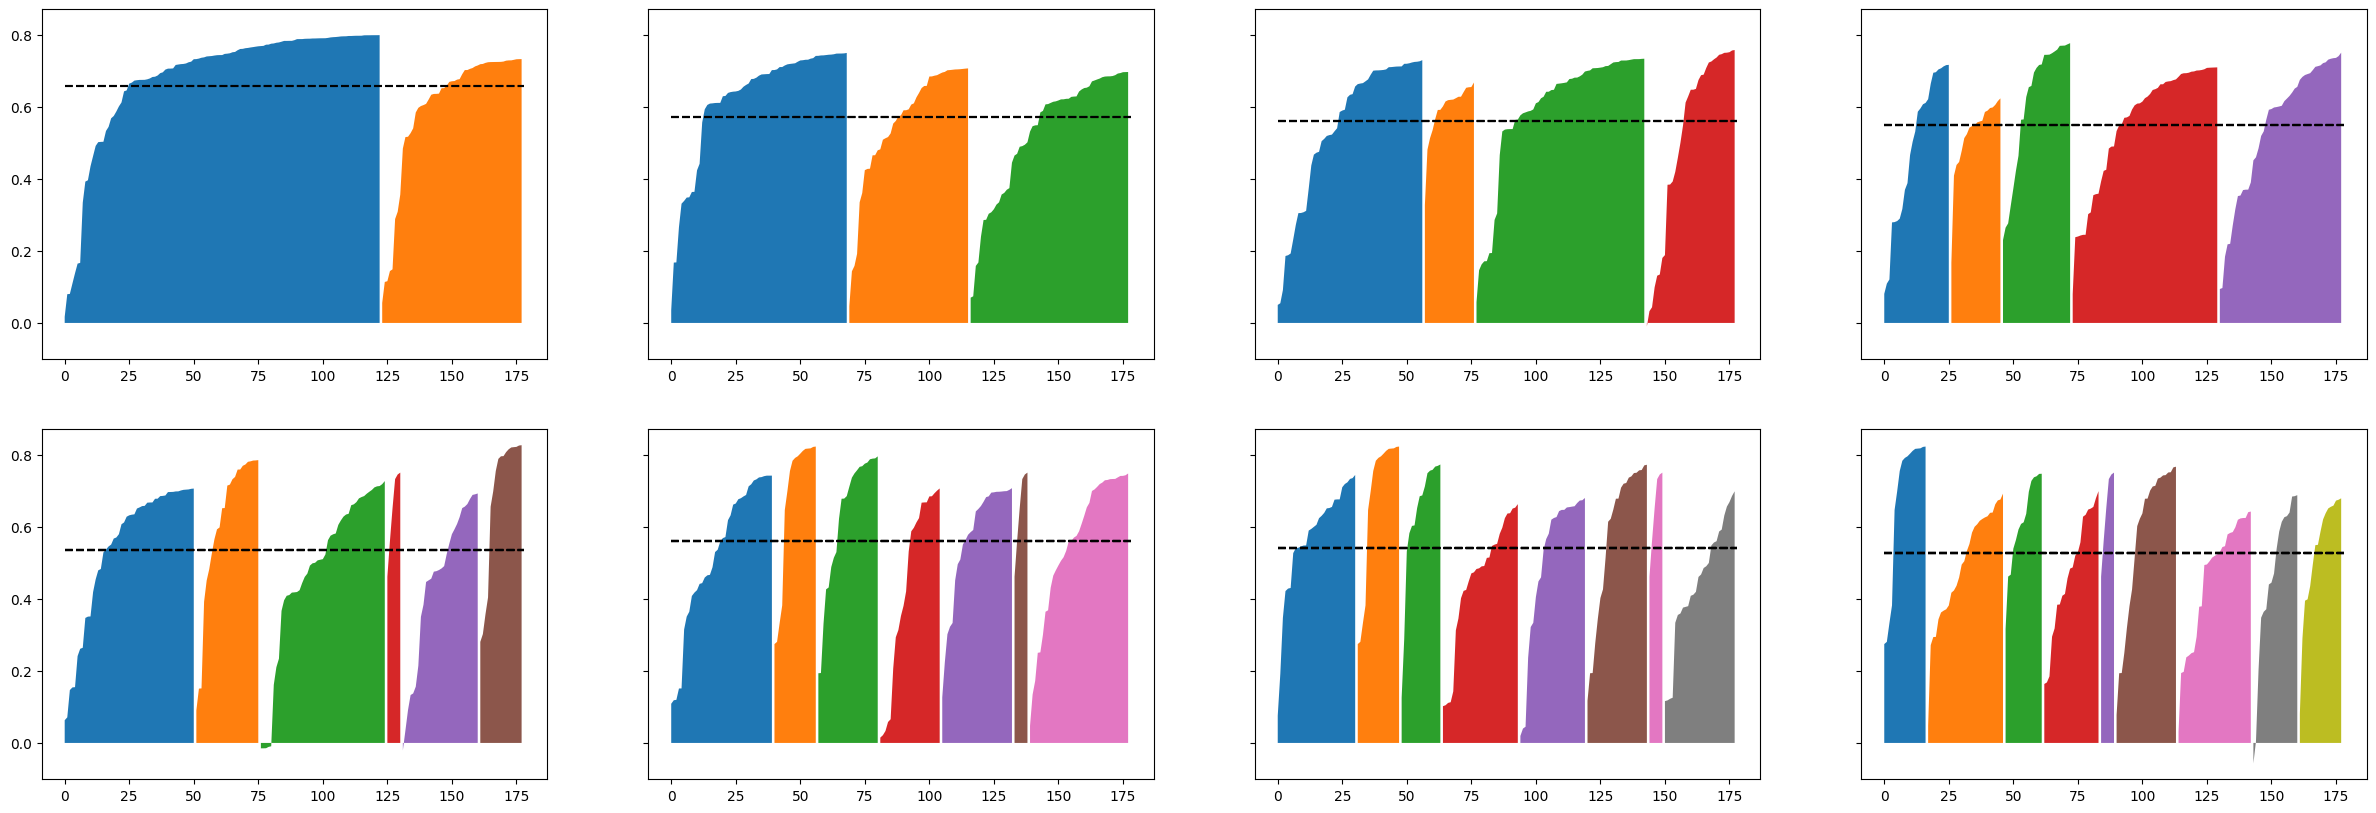

In [67]:
# Silhouette method for finding natural clusters

fig, ax = plt.subplots(2,4, sharey=True, figsize=(30,10))
for i in n_clusters:
    km = KMeans(n_clusters=i).fit(uci_wine_unlabeled)
    silhouette_average = silhouette_score(uci_wine_unlabeled, km.labels_)
    sample_silhouette = silhouette_samples(uci_wine_unlabeled, km.labels_)
    x_start = 0
    for cluster_i in range(i):
        ith_cluster_samples = sample_silhouette[km.labels_ == cluster_i]
        ith_cluster_samples.sort()
        x_end = x_start + ith_cluster_samples.shape[0]
        ax[(i-2)//4][(i-2)%4].fill_between(np.arange(x_start, x_end), 0, ith_cluster_samples)
        ax[(i-2)//4][(i-2)%4].plot([0,sample_silhouette.shape[0]],[silhouette_average, silhouette_average], '--', color='black')
        x_start = x_end 
